# <u>Part 1:</u> Data pre-processing

<b><u>Authors</u> :</b> Eytan Levy, Guillaume Surleau et Manitas Bahri  
<b><u>Date</u> :</b> March 2023

In [1]:
# Librairies import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

# Define the path to the parent directory
import sys
sys.path.append("../")

# Import the custom functions
from py_scripts.Utils import Utils
from py_scripts.PreProcessing import PreProcessing


In [2]:
# To display all the columns and rows of the dataframe in the notebook
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


In [3]:
pp = PreProcessing()

# Load the original dataset
DATASET_ORI = pp.load_dataset()
DATASET_ORI.describe()


,id_individual,gender,id_group,p_id,match,interrest_correlation,samerace,p_age,p_race,p_important_attractive,p_important_sinsere,p_important_intelligence,p_important_fun,p_important_ambitious,p_important_shared_interests,p_decision,p_rate_attractive,p_rate_sincere,p_rate_intelligence,p_rate_fun,p_rate_ambitious,p_rate_shared_interests,p_rate_like,p_rate_prob_like,age,id_work_field,world,world_pref,imprelig,exp_relation,frequency_go_out,career_c,sports,interest_tvsports,interest_exercise,interest_dining,interest_museums,interest_art,interest_hiking,interest_gaming,interest_clubbing,interest_reading,interest_tv,interest_theater,interest_movies,interest_concerts,interest_music,interest_shopping,interest_yoga,exphappy,number_speed_dating,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,attr4_1,sinc4_1,intel4_1,fun4_1,amb4_1,shar4_1,attr2_1,sinc2_1,intel2_1,fun2_1,amb2_1,shar2_1,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1,attr5_1,sinc5_1,intel5_1,fun5_1,amb5_1,decision,rate_self_attractive,rate_self_sincere,rate_self_intelligence,rate_self_fun,rate_self_ambitious,rate_self_shared_interests,rate_self_like,rate_prob_like,number_match,attr1_s,sinc1_s,intel1_s,fun1_s,amb1_s,shar1_s,attr3_s,sinc3_s,intel3_s,fun3_s,amb3_s,attr7_2,sinc7_2,intel7_2,fun7_2,amb7_2,shar7_2,attr1_2,sinc1_2,intel1_2,fun1_2,amb1_2,shar1_2,attr4_2,sinc4_2,intel4_2,fun4_2,amb4_2,shar4_2,attr2_2,sinc2_2,intel2_2,fun2_2,amb2_2,shar2_2,attr3_2,sinc3_2,intel3_2,fun3_2,amb3_2,attr5_2,sinc5_2,intel5_2,fun5_2,amb5_2,you_call,them_cal,date_3,numdat_3,num_in_3,attr1_3,sinc1_3,intel1_3,fun1_3,amb1_3,shar1_3,attr7_3,sinc7_3,intel7_3,fun7_3,amb7_3,shar7_3,attr4_3,sinc4_3,intel4_3,fun4_3,amb4_3,shar4_3,attr2_3,sinc2_3,intel2_3,fun2_3,amb2_3,shar2_3,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
count,8378.000000,8378.000000,8378.000000,8368.000000,8378.000000,8220.000000,8378.000000,8274.000000,8305.000000,8289.000000,8289.000000,8289.000000,8280.000000,8271.000000,8249.000000,8378.000000,8166.000000,8091.000000,8072.000000,8018.000000,7656.000000,7302.000000,8128.000000,8060.000000,8283.000000,8296.000000,8315.000000,8299.000000,8299.000000,8299.000000,8299.000000,8240.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8277.000000,1800.000000,8299.000000,8299.000000,8299.000000,8289.000000,8279.000000,8257.000000,6489.000000,6489.000000,6489.000000,6489.000000,6489.000000,6467.000000,8299.000000,8299.000000,8299.000000,8299.000000,8289.000000,8289.000000,8273.000000,8273.000000,8273.000000,8273.000000,8273.000000,4906.000000,4906.000000,4906.000000,4906.000000,4906.000000,8378.000000,8176.000000,8101.000000,8082.000000,8028.000000,7666.000000,7311.000000,8138.000000,8069.000000,7205.000000,4096.000000,4096.000000,4096.000000,4096.000000,4096.000000,4096.000000,4000.00000,4000.000000,4000.000000,4000.000000,4000.000000,1984.000000,1955.000000,1984.000000,1984.000000,1955.000000,1974.000000,7445.000000,7463.000000,7463.000000,7463.000000,7463.000000,7463.000000,5775.000000,5775.000000,5775.000000,5775.000000,5775.000000,5775.000000,5775.000000,5775.00000,5775.000000,5775.000000,5775.000000,5775.000000,7463.000000,7463.000000,7463.000000,7463.000000,7463.000000,4377.000000,4377.000000,4377.000000,4377.000000,4377.000000,3974.000000,3974.000000,3974.000000,1496.000000,668.000000,3974.000000,3974.000000,3974.000000,3974.000000,3974.000000,3974.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2016.000000,3974.000000,3974.000000,3974.000000,3974.000000,3974.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000
mean,283.675937,0.500597,17.327166,283.863767,0.164717,0.196010,0.395799,26.364999,2.756653,22.495347,17.396867,20.270759,

## I. Features selections

In [4]:
# Compute the number of null values in each column
greater_than = 30
DATASET, DF_NULL = pp.remove_cols_with_null_data(DATASET_ORI, greater_than)


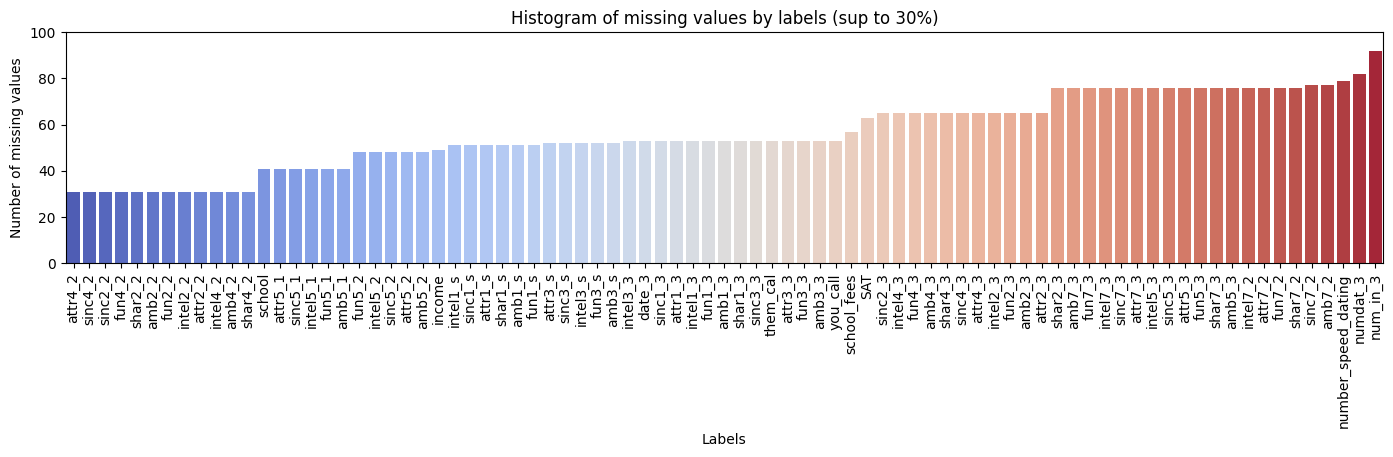

In [6]:
data = DF_NULL[DF_NULL["ratio"] >= greater_than]

# Visualize the number of null values in each column
plt.figure(figsize=(17, 3))
sns.barplot(data=data, x="label", y="ratio", palette="coolwarm")
plt.title(f"Histogram of missing values by labels (sup to {greater_than}%)")
plt.xticks(rotation=90)
plt.xlabel("Labels")
plt.ylabel("Ratio (%)")
plt.ylim(0, 100)
plt.show()


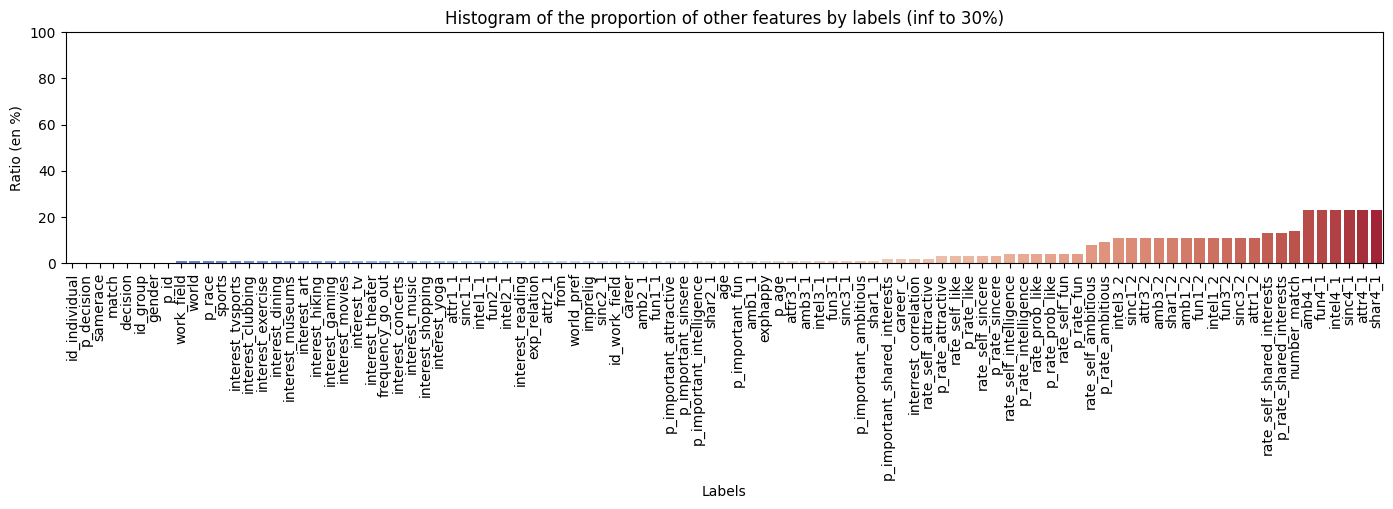

In [7]:
data = DF_NULL[DF_NULL["ratio"] < greater_than]

# Visualize the proportion of other features
plt.figure(figsize=(17, 3))
sns.barplot(data=data, x="label", y="ratio", palette="coolwarm")
plt.title(f"Histogram of the proportion of other features by labels (inf to {greater_than}%)")
plt.xticks(rotation=90)
plt.xlabel("Labels")
plt.ylabel("Ratio (%)")
plt.ylim(0, 100)
plt.show()


## II. Processing of null values

### 1. Encoding and normalizing features
- The range columns are set between 1 and 10.
- Apply the multiple encoding method to `from`, `work_field` and `career` features.

In [7]:
# Normalize features with a range of values
DATASET = pp.normalize_range_columns(DATASET)
DATASET.describe()


,id_individual,gender,id_group,p_id,match,interrest_correlation,samerace,p_age,p_race,p_important_attractive,p_important_sinsere,p_important_intelligence,p_important_fun,p_important_ambitious,p_important_shared_interests,p_decision,p_rate_attractive,p_rate_sincere,p_rate_intelligence,p_rate_fun,p_rate_ambitious,p_rate_shared_interests,p_rate_like,p_rate_prob_like,age,id_work_field,world,world_pref,imprelig,exp_relation,frequency_go_out,career_c,sports,interest_tvsports,interest_exercise,interest_dining,interest_museums,interest_art,interest_hiking,interest_gaming,interest_clubbing,interest_reading,interest_tv,interest_theater,interest_movies,interest_concerts,interest_music,interest_shopping,interest_yoga,exphappy,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,attr4_1,sinc4_1,intel4_1,fun4_1,amb4_1,shar4_1,attr2_1,sinc2_1,intel2_1,fun2_1,amb2_1,shar2_1,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1,decision,rate_self_attractive,rate_self_sincere,rate_self_intelligence,rate_self_fun,rate_self_ambitious,rate_self_shared_interests,rate_self_like,rate_prob_like,number_match,attr1_2,sinc1_2,intel1_2,fun1_2,amb1_2,shar1_2,attr3_2,sinc3_2,intel3_2,fun3_2,amb3_2
count,8378.000000,8378.000000,8378.000000,8368.000000,8378.000000,8220.000000,8378.000000,8274.000000,8305.000000,8289.000000,8289.000000,8289.000000,8280.000000,8271.000000,8249.000000,8378.000000,8166.000000,8091.000000,8072.000000,8018.000000,7656.000000,7302.000000,8128.000000,8060.000000,8283.000000,8296.000000,8315.000000,8299.000000,8299.000000,8299.000000,8299.000000,8240.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8277.000000,8299.000000,8299.000000,8299.000000,8289.000000,8279.000000,8257.000000,6489.000000,6489.000000,6489.000000,6489.000000,6489.000000,6467.000000,8299.000000,8299.000000,8299.000000,8299.000000,8289.000000,8289.000000,8273.000000,8273.000000,8273.000000,8273.000000,8273.000000,8378.000000,8176.000000,8101.000000,8082.000000,8028.000000,7666.000000,7311.000000,8138.000000,8069.000000,7205.000000,7445.000000,7463.000000,7463.000000,7463.000000,7463.000000,7463.000000,7463.000000,7463.000000,7463.000000,7463.000000,7463.000000
mean,283.675937,0.500597,17.327166,283.863767,0.164717,0.196010,0.395799,26.364999,2.756653,2.288817,1.774279,2.036796,1.800604,1.078588,1.195903,0.419551,6.190301,7.175133,7.369301,6.400599,6.778605,5.474938,6.133243,5.207940,26.358928,7.662488,2.757186,3.784793,3.651645,2.122063,2.158091,5.277791,6.425232,4.575491,6.245813,7.783829,6.985781,6.714544,5.737077,3.843596,5.745993,7.660080,5.304133,6.776118,7.919629,6.825401,7.851066,5.631281,4.339197,5.534131,2.290517,1.774310,2.036269,1.800338,1.078029,1.195713,2.662198,1.127138,1.336724,1.611650,0.975343,1.134375,3.026509,1.328714,1.485601,1.876130,1.138738,1.176258,7.084733,8.294935,7.704460,8.403965,7.578388,0.419909,6.189946,7.175040,7.368597,6.400722,6.777720,5.474627,6.132834,5.207213,3.207814,2.648220,1.629104,1.837465,1.826075,0.978695,1.279512,7.125285,7.931529,8.238912,7.602171,7.486802
std,158.583367,0.500029,10.940735,158.584899,0.370947,0.303539,0.489051,3.563648,1.230689,1.272698,0.738871,0.663603,0.635523,0.801368,0.788298,0.493515,1.950529,1.740623,1.550860,1.953918,1.794168,2.156235,1.841468,2.129144,3.566763,3.758935,1.230905,2.845708,2.805237,1.407181,1.105246,3.309520,2.619024,2.801874,2.418858,1.754868,2.052232,2.263407,2.570207,2.501024,2.502218,1.971051,2.529135,2.235152,1.700927,2.156283,1.791827,2.608913,2.717612,1.734059,1.274392,0.739047,0.663594,0.635630,0.801333,0.788401,1.616115,0.792236,0.745647,0.718927,0.834858,0.735540,1.656082,0.832376,0.713387,0.648028,0.832674,0.765090,1.395783,1.407460,1.564321,1.076608,1.778315,0.493573,1.950520,1.740363,1.550812,1.953804,1.794143,2.156435,1.841495,2.129355,2.444813,1.460095,0.746596,0.667008,0.639771,0.753408,0.791856,1.371390,1.503236,1.180280,1.5482

In [8]:
# Normalizes and encodes the values of the work_fields, career and from columns.
to_multhot_encode =  ["work_field", "career", "from"]
DATASET = pp.enc_multhot_dataframe(DATASET, to_multhot_encode)

DATASET.head()


,id_individual,gender,id_group,p_id,match,interrest_correlation,samerace,p_age,p_race,p_important_attractive,p_important_sinsere,p_important_intelligence,p_important_fun,p_important_ambitious,p_important_shared_interests,p_decision,p_rate_attractive,p_rate_sincere,p_rate_intelligence,p_rate_fun,p_rate_ambitious,p_rate_shared_interests,p_rate_like,p_rate_prob_like,age,id_work_field,world,world_pref,imprelig,exp_relation,frequency_go_out,career_c,sports,interest_tvsports,interest_exercise,interest_dining,interest_museums,interest_art,interest_hiking,interest_gaming,interest_clubbing,interest_reading,interest_tv,interest_theater,interest_movies,interest_concerts,interest_music,interest_shopping,interest_yoga,exphappy,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,attr4_1,sinc4_1,intel4_1,fun4_1,amb4_1,shar4_1,attr2_1,sinc2_1,intel2_1,fun2_1,amb2_1,shar2_1,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1,decision,rate_self_attractive,rate_self_sincere,rate_self_intelligence,rate_self_fun,rate_self_ambitious,rate_self_shared_interests,rate_self_like,rate_prob_like,number_match,attr1_2,sinc1_2,intel1_2,fun1_2,amb1_2,shar1_2,attr3_2,sinc3_2,intel3_2,fun3_2,amb3_2,work_field_art,work_field_business,work_field_education,work_field_health,work_field_law,work_field_literature,work_field_science,work_field_social,career_art,career_business,career_education,career_health,career_law,career_literature,career_science,career_social,from_north-america,from_south-america,from_europe,from_africa,from_asia,from_oceania,from_antartica
0,1,0,1,11.0,0,0.14,0,27.0,2.0,4.0,2.0,2.0,2.0,0.0,0.0,0,6.0,8.0,8.0,8.0,8.0,6.0,7.0,4.0,21.0,1.0,4.0,2.0,4.0,2.0,1.0,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,2.0,2.0,2.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,4.0,2.0,2.0,2.0,0.0,0.0,6.0,8.0,8.0,8.0,7.0,1,6.0,9.0,7.0,7.0,6.0,5.0,7.0,6.0,4.0,2.0,2.0,1.0,2.0,1.0,2.0,6.0,7.0,8.0,7.0,6.0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
1,1,0,1,12.0,0,0.54,0,22.0,2.0,6.0,0.0,0.0,4.0,0.0,0.0,0,7.0,8.0,10.0,7.0,7.0,5.0,8.0,4.0,21.0,1.0,4.0,2.0,4.0,2.0,1.0,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,2.0,2.0,2.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,4.0,2.0,2.0,2.0,0.0,0.0,6.0,8.0,8.0,8.0,7.0,1,7.0,8.0,7.0,8.0,5.0,6.0,7.0,5.0,4.0,2.0,2.0,1.0,2.0,1.0,2.0,6.0,7.0,8.0,7.0,6.0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
2,1,0,1,13.0,1,0.16,1,22.0,4.0,2.0,2.0,2.0,2.0,1.0,1.0,1,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,21.0,1.0,4.0,2.0,4.0,2.0,1.0,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,2.0,2.0,2.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,4.0,2.0,2.0,2.0,0.0,0.0,6.0,8.0,8.0,8.0,7.0,1,5.0,8.0,9.0,8.0,5.0,7.0,7.0,NaN,4.0,2.0,2.0,1.0,2.0,1.0,2.0,6.0,7.0,8.0,7.0,6.0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
3,1,0,1,14.0,1,0.61,0,23.0,2.0,3.0,0.0,2.0,4.0,0.0,0.0,1,7.0,8.0,9.0,8.0,9.0,8.0,7.0,7.0,21.0,1.0,4.0,2.0,4.0,2.0,1.0,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,2.0,2.0,2.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,4.0,2.0,2.0,2.0,0.0,0.0,6.0,8.0,8.0,8.0,7.0,1,7.0,6.0,8.0,7.0,6.0,8.0,7.0,6.0,4.0,2.0,2.0,1.0,2.0,1.0,2.0,6.0,7.0,8.0,7.0,6.0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
4,1,0,1,15.0,1,0.21,0,24.0,3.0,3.0,1.0,2.0,1.0,1.0,2.0,1,8.0,7.0,9.0,6.0,9.0,7.0,8.0,6.0,21.0,1.0,4.0,2.0,4.0,2.0,1.0,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,2.0,2.0,2.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,4.0,2.0,2.0,2.0,0.0,0.0,6.0,8.0,8.0,8.0,7.0,1,5.0,6.0,7.0,7.0,6.0,6.0,6.0,6.0,4.0,2.0,2.0,1.0,2.0,1.0,2.0,6.0,7.0,8.0,7.0,6.0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0


### 2. Study of the correlation of personality data
Analyze if we can fill in the missing values of the important personality keys with the secondary keys in an intelligent way.

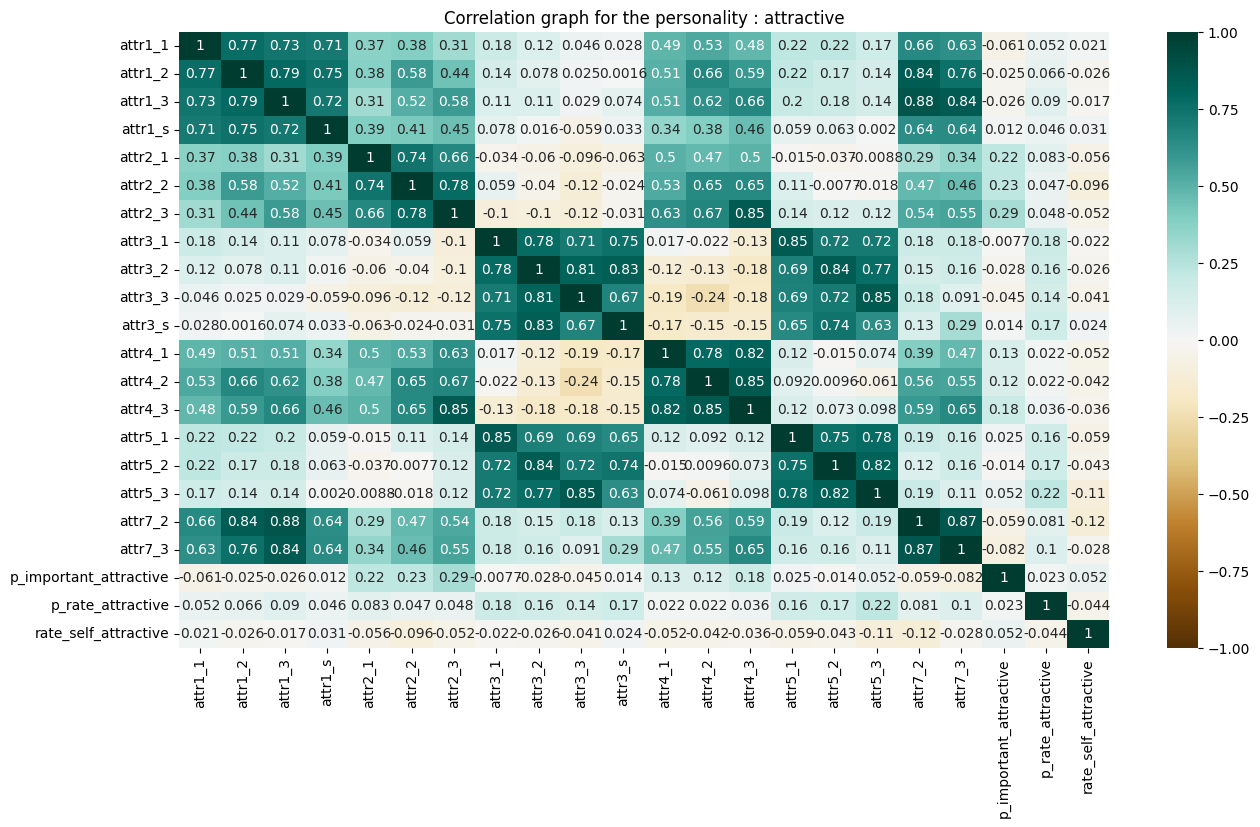

In [9]:
# Dictionary associating the personality with their abbreviation
PERSONALITIES = {"attractive": "attr", "sincerite": "sinc",  "intelligence": "intel",
                 "generosite": "shar", "ambition": "amb",  "humour": "fun"}

# The personality we want to study
perso = "attractive"
data = Utils.filter_dataframe_by_substr(DATASET_ORI, PERSONALITIES[perso]).corr()

# Visualize the correlation of features linked to this personality
# To see if we can complete the missing values of the important keys.
plt.figure(figsize=(15, 8))
sns.heatmap(data, annot=True, vmin=-1, vmax=1, cmap="BrBG")
plt.title(f"Correlation graph for the personality : {perso}")
plt.show()


In [10]:
# We can see that the missing values of the important keys are not correlated with the other keys.
# So we can remove features of secondary personality.
DATASET = pp.remove_cols_personnality_snd(DATASET)

stat = DATASET.describe()
stat.loc["null"] = DATASET.isna().sum()
stat

,id_individual,gender,id_group,p_id,match,interrest_correlation,samerace,p_age,p_race,p_important_attractive,p_important_sinsere,p_important_intelligence,p_important_fun,p_important_ambitious,p_important_shared_interests,p_decision,p_rate_attractive,p_rate_sincere,p_rate_intelligence,p_rate_fun,p_rate_ambitious,p_rate_shared_interests,p_rate_like,p_rate_prob_like,age,id_work_field,world,world_pref,imprelig,exp_relation,frequency_go_out,career_c,sports,interest_tvsports,interest_exercise,interest_dining,interest_museums,interest_art,interest_hiking,interest_gaming,interest_clubbing,interest_reading,interest_tv,interest_theater,interest_movies,interest_concerts,interest_music,interest_shopping,interest_yoga,exphappy,decision,rate_self_attractive,rate_self_sincere,rate_self_intelligence,rate_self_fun,rate_self_ambitious,rate_self_shared_interests,rate_self_like,rate_prob_like,number_match,work_field_art,work_field_business,work_field_education,work_field_health,work_field_law,work_field_literature,work_field_science,work_field_social,career_art,career_business,career_education,career_health,career_law,career_literature,career_science,career_social,from_north-america,from_south-america,from_europe,from_africa,from_asia,from_oceania,from_antartica
count,8378.000000,8378.000000,8378.000000,8368.000000,8378.000000,8220.000000,8378.000000,8274.000000,8305.000000,8289.000000,8289.000000,8289.000000,8280.000000,8271.000000,8249.000000,8378.000000,8166.000000,8091.000000,8072.000000,8018.000000,7656.000000,7302.000000,8128.000000,8060.000000,8283.000000,8296.000000,8315.000000,8299.000000,8299.000000,8299.000000,8299.000000,8240.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8277.000000,8378.000000,8176.000000,8101.000000,8082.000000,8028.000000,7666.000000,7311.000000,8138.000000,8069.000000,7205.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.0
mean,283.675937,0.500597,17.327166,283.863767,0.164717,0.196010,0.395799,26.364999,2.756653,2.288817,1.774279,2.036796,1.800604,1.078588,1.195903,0.419551,6.190301,7.175133,7.369301,6.400599,6.778605,5.474938,6.133243,5.207940,26.358928,7.662488,2.757186,3.784793,3.651645,2.122063,2.158091,5.277791,6.425232,4.575491,6.245813,7.783829,6.985781,6.714544,5.737077,3.843596,5.745993,7.660080,5.304133,6.776118,7.919629,6.825401,7.851066,5.631281,4.339197,5.534131,0.419909,6.189946,7.175040,7.368597,6.400722,6.777720,5.474627,6.132834,5.207213,3.207814,0.066126,0.260444,0.104679,0.172953,0.172714,0.053473,0.231917,0.129625,0.050131,0.263667,0.211148,0.054309,0.119718,0.046192,0.161494,0.070184,0.702793,0.021724,0.124254,0.002387,0.135354,0.002387,0.0
std,158.583367,0.500029,10.940735,158.584899,0.370947,0.303539,0.489051,3.563648,1.230689,1.272698,0.738871,0.663603,0.635523,0.801368,0.788298,0.493515,1.950529,1.740623,1.550860,1.953918,1.794168,2.156235,1.841468,2.129144,3.566763,3.758935,1.230905,2.845708,2.805237,1.407181,1.105246,3.309520,2.619024,2.801874,2.418858,1.754868,2.052232,2.263407,2.570207,2.501024,2.502218,1.971051,2.529135,2.235152,1.700927,2.156283,1.791827,2.608913,2.717612,1.734059,0.493573,1.950520,1.740363,1.550812,1.953804,1.794143,2.156435,1.841495,2.129355,2.444813,0.248516,0.438903,0.306158,0.378229,0.378023,0.224989,0.422081,0.335911,0.218229,0.440647,0.408148,0.226640,0.324651,0.209914,0.368008,0.255472,0.457056,0.145788,0.329891,0.048804,0.342122,0.048804,0.0
min,1.000000,0.000000,1.000000,1.000000,0.000000,-0.830000,0.000000,18.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000,1.0

In [11]:
# Fill the NaN values
DATASET = pp.fill_nan_dataframe(DATASET)

stat = DATASET.describe()
stat.loc["null"] = DATASET.isna().sum()
stat


,id_individual,gender,id_group,p_id,match,interrest_correlation,samerace,p_age,p_race,p_important_attractive,p_important_sinsere,p_important_intelligence,p_important_fun,p_important_ambitious,p_important_shared_interests,p_decision,p_rate_attractive,p_rate_sincere,p_rate_intelligence,p_rate_fun,p_rate_ambitious,p_rate_shared_interests,p_rate_like,p_rate_prob_like,age,id_work_field,world,world_pref,imprelig,exp_relation,frequency_go_out,career_c,sports,interest_tvsports,interest_exercise,interest_dining,interest_museums,interest_art,interest_hiking,interest_gaming,interest_clubbing,interest_reading,interest_tv,interest_theater,interest_movies,interest_concerts,interest_music,interest_shopping,interest_yoga,exphappy,decision,rate_self_attractive,rate_self_sincere,rate_self_intelligence,rate_self_fun,rate_self_ambitious,rate_self_shared_interests,rate_self_like,rate_prob_like,number_match,work_field_art,work_field_business,work_field_education,work_field_health,work_field_law,work_field_literature,work_field_science,work_field_social,career_art,career_business,career_education,career_health,career_law,career_literature,career_science,career_social,from_north-america,from_south-america,from_europe,from_africa,from_asia,from_oceania,from_antartica
count,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.0
mean,283.675937,0.500597,17.327166,283.863767,0.164717,0.196010,0.395799,26.360468,2.756653,2.285748,1.776677,2.036405,1.802936,1.077584,1.192886,0.419551,6.185486,7.169133,7.355813,6.383385,6.797684,5.413941,6.129267,5.200048,26.354858,7.662488,2.757186,3.784793,3.654930,2.122063,2.156601,5.277791,6.421222,4.579494,6.243495,7.785868,6.985915,6.717236,5.739556,3.845070,5.748389,7.663285,5.301265,6.778229,7.920387,6.827047,7.852471,5.634758,4.335999,5.539747,0.419909,6.185366,7.169253,7.355574,6.383982,6.796610,5.414180,6.129028,5.199570,3.207814,0.066126,0.260444,0.104679,0.172953,0.172714,0.053473,0.231917,0.129625,0.050131,0.263667,0.211148,0.054309,0.119718,0.046192,0.161494,0.070184,0.702793,0.021724,0.124254,0.002387,0.135354,0.002387,0.0
std,158.583367,0.500029,10.940735,158.490216,0.370947,0.300663,0.489051,3.541689,1.225315,1.266265,0.735300,0.660079,0.632158,0.796283,0.782577,0.493515,1.925922,1.710843,1.523847,1.913198,1.716233,2.019259,1.813924,2.088719,3.546684,3.740492,1.226267,2.832258,2.792181,1.400530,1.100129,3.282147,2.606969,2.788933,2.407542,1.746698,2.042533,2.252878,2.558186,2.489249,2.490512,1.962010,2.517353,2.224693,1.692906,2.146157,1.783416,2.596826,2.704966,1.724324,0.493573,1.927080,1.711633,1.524686,1.914233,1.717323,2.020629,1.815059,2.090078,2.267192,0.248516,0.438903,0.306158,0.378229,0.378023,0.224989,0.422081,0.335911,0.218229,0.440647,0.408148,0.226640,0.324651,0.209914,0.368008,0.255472,0.457056,0.145788,0.329891,0.048804,0.342122,0.048804,0.0
min,1.000000,0.000000,1.000000,1.000000,0.000000,-0.830000,0.000000,18.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000,1.0

## III. Data re-scaling

In [12]:
# Define the columns to normalize and standardize
norm_columns = ["world_pref", "imprelig", "sports", "rate_prob_like"]
norm_substr = ["p_important_", "p_rate_", "interest_", "rate_self_"]
norm_substr = Utils.get_matching_keys(DATASET.columns, norm_substr)
norm_columns = norm_columns + norm_substr

stand_columns = ["p_age", "p_race", "age", "exp_relation", "frequency_go_out",
                 "number_match"]

# Create a new dataframe with the normalized and standardized columns
DATASET_DIST = DATASET[stand_columns + norm_columns]

# Normalize and standardize the columns
pp.normalize_dataframe(DATASET, norm_columns)
pp.standardize_dataframe(DATASET, stand_columns)


In [13]:
# Display the dataset after the rescaling
DATASET.describe()

,id_individual,gender,id_group,p_id,match,interrest_correlation,samerace,p_age,p_race,p_important_attractive,p_important_sinsere,p_important_intelligence,p_important_fun,p_important_ambitious,p_important_shared_interests,p_decision,p_rate_attractive,p_rate_sincere,p_rate_intelligence,p_rate_fun,p_rate_ambitious,p_rate_shared_interests,p_rate_like,p_rate_prob_like,age,id_work_field,world,world_pref,imprelig,exp_relation,frequency_go_out,career_c,sports,interest_tvsports,interest_exercise,interest_dining,interest_museums,interest_art,interest_hiking,interest_gaming,interest_clubbing,interest_reading,interest_tv,interest_theater,interest_movies,interest_concerts,interest_music,interest_shopping,interest_yoga,exphappy,decision,rate_self_attractive,rate_self_sincere,rate_self_intelligence,rate_self_fun,rate_self_ambitious,rate_self_shared_interests,rate_self_like,rate_prob_like,number_match,work_field_art,work_field_business,work_field_education,work_field_health,work_field_law,work_field_literature,work_field_science,work_field_social,career_art,career_business,career_education,career_health,career_law,career_literature,career_science,career_social,from_north-america,from_south-america,from_europe,from_africa,from_asia,from_oceania,from_antartica
count,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8.378000e+03,8.378000e+03,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8.378000e+03,8378.000000,8378.000000,8378.000000,8378.000000,8.378000e+03,8.378000e+03,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8.378000e+03,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.0
mean,283.675937,0.500597,17.327166,283.863767,0.164717,0.196010,0.395799,8.481054e-17,-2.340771e-16,0.228575,0.296113,0.407281,0.360587,0.215517,0.397629,0.419551,0.618549,0.716913,0.735581,0.638339,0.679768,0.541394,0.612927,0.520005,-3.528119e-16,7.662488,2.757186,0.378479,0.294992,-1.645325e-16,1.713173e-16,5.277791,0.602358,0.397722,0.582611,0.753985,0.698592,0.671724,0.573956,0.384507,0.574839,0.740365,0.477918,0.677823,0.792039,0.682705,0.761386,0.514973,0.433600,5.539747,0.419909,0.618537,0.716925,0.735557,0.638398,0.679661,0.541418,0.612903,0.519957,1.696211e-18,0.066126,0.260444,0.104679,0.172953,0.172714,0.053473,0.231917,0.129625,0.050131,0.263667,0.211148,0.054309,0.119718,0.046192,0.161494,0.070184,0.702793,0.021724,0.124254,0.002387,0.135354,0.002387,0.0
std,158.583367,0.500029,10.940735,158.490216,0.370947,0.300663,0.489051,1.000000e+00,1.000000e+00,0.126627,0.122550,0.132016,0.126432,0.159257,0.260859,0.493515,0.192592,0.171084,0.152385,0.191320,0.171623,0.201926,0.181392,0.208872,1.000000e+00,3.740492,1.226267,0.283226,0.310242,1.000000e+00,1.000000e+00,3.282147,0.289663,0.309881,0.267505,0.194078,0.204253,0.225288,0.255819,0.248925,0.249051,0.218001,0.279706,0.222469,0.169291,0.214616,0.198157,0.288536,0.270497,1.724324,0.493573,0.192708,0.171163,0.152469,0.191423,0.171732,0.202063,0.181506,0.209008,1.000000e+00,0.248516,0.438903,0.306158,0.378229,0.378023,0.224989,0.422081,0.335911,0.218229,0.440647,0.408148,0.226640,0.324651,0.209914,0.368008,0.255472,0.457056,0.145788,0.329891,0.048804,0.342122,0.048804,0.0
min,1.000000,0.000000,1.000000,1.000000,0.000000,-0.830000,0.000000,-2.360588e+00,-1.433634e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0

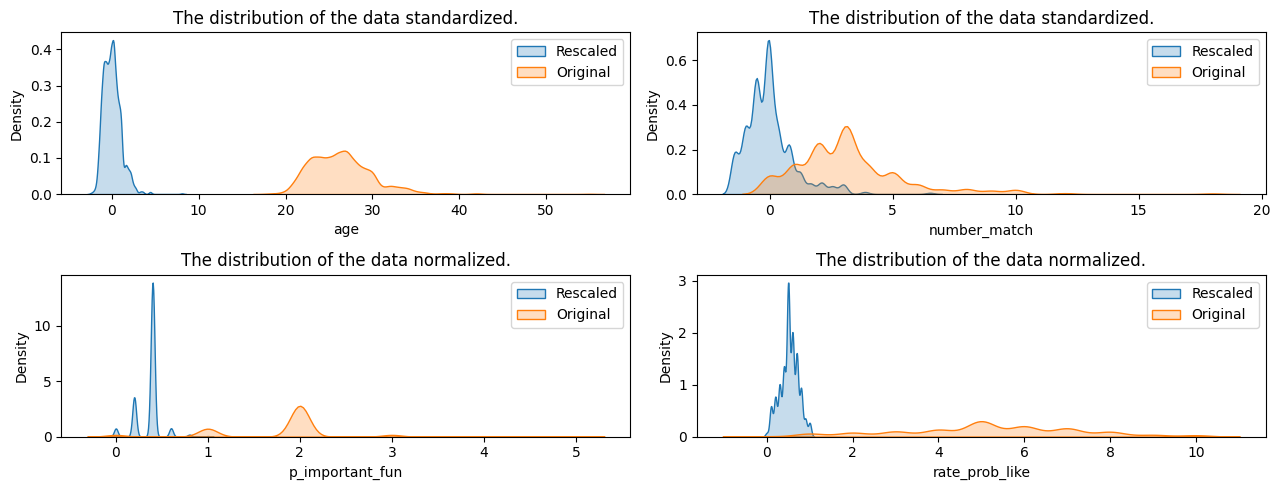

In [14]:
# Display the dataset before and after the rescaling
cols = ["age", "number_match", "p_important_fun", "rate_prob_like"]
titles = ["standardized", "standardized", "normalized", "normalized"]
i = 0

fig, axes = plt.subplots(2, 2,  figsize=(13, 5))
axes = axes.ravel()  # type:ignore


for col, ax in zip(cols, axes):
    ax.set_title(f"The distribution of the data {titles[i]}.")
    sns.kdeplot(data=DATASET[col], ax=ax, fill=True, label="Rescaled")
    sns.kdeplot(data=DATASET_DIST[col], ax=ax, fill=True, label="Original")
    ax.legend()
    i += 1


fig.tight_layout()
plt.show()
